# Project: Investigating Brazillian No-Show Medical Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p>
    This report attempts to explore a dataset containing 100k medical appointments in Brazil and aims to understand the contributing factors that determines if a patient attends the appointment. First, the data needs to be cleaned, the steps are detailed in the data wrangling section. Next, a series of hypotheses are presented that attempt to find correlations between the various variables. Finally, these questions are discussed and the findings are presented.
</p>

<p>
   First, we should load pandas and numpy
</p>

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
% matplotlib inline

# Set the style for the graphs
sns.set_style('darkgrid')

## Data Wrangling

<p>
    Firstly, the dataset is loaded from the provided CSV file, and the key properties and types are displayed:
</p>

In [44]:
rawDf = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

rawDf.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The key characteristics included in each row are:
<ul>
    <li><b>ScheduledDay</b> - The date that the patient booked the appointment</li>
    <li><b>Neighborhood</b> - The location of the hospital</li>
    <li><b>Scholarship</b> - Indicates if the patient is enrolled in Bolsa Familia, the Brasilian welfare program</li>
    <li><b>Gender</b> - The gender of the patient</li>
    <li><b>Age</b> - The age of the patient</li>
    <li><b>No Show</b> - Indicates if the patient showed to the appointment - 'Yes' means the patient did not show up</li>
</ul>

<p>
    The datatypes of the data set are as follows:
</p>

## General Properties
This section will analyse the structure of the data to ensure, identify any outliers and discuss issues with the dataset. 
    
First, the types of each column are listed

In [45]:
rawDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<b style='color: red'>- No-show is boolean, represented as string</b> All other boolean fields are represented as int64, while the no-show field is a string. Also, the name no-show is a confusing name, this should ideally be renamed

<hr />

In [46]:
# It looks like some of these are objects, check the types to see if its a date or a string
print("AppointmentDay: " + type(rawDf['AppointmentDay'][0]).__name__)
print("ScheduledDay: " + type(rawDf['AppointmentDay'][0]).__name__)

AppointmentDay: str
ScheduledDay: str


<b style='color: red'>- Date fields are strings</b> It looks like the AppointmentDay and ScheduledDay fields are both string representations of the date. This will make it difficult to analyse. These should be converted to Date objects

<hr />

Check the boolean fields to make sure they are all within range:

In [47]:
# Grab the unique Gender fields to make sure that they are all either M or F
print("Gender: ")
print(rawDf['Gender'].unique())

# Get the scholarship fields to make sure they are either true (1) or false (0)
print("\nScholarship:")
print(rawDf['Scholarship'].unique())

# Get the Hipertension fields to make sure they are either true (1) or false (0)
print("\nHipertension:")
print(rawDf['Hipertension'].unique())

# Get the Alcoholism fields to make sure they are either true (1) or false (0)
print("\nAlcoholism:")
print(rawDf['Alcoholism'].unique())

# Get the Handcap fields to make sure they are either true (1) or false (0)
print("\nHandcap:")
print(rawDf['Handcap'].unique())

# Get the Diabetes fields to make sure they are either true (1) or false (0)
print("\nDiabetes:")
print(rawDf['Diabetes'].unique())

# Get the SMS_received fields to make sure they are either true (1) or false (0)
print("\nSMS_received:")
print(rawDf['SMS_received'].unique())

Gender: 
['F' 'M']

Scholarship:
[0 1]

Hipertension:
[1 0]

Alcoholism:
[0 1]

Handcap:
[0 1 2 3 4]

Diabetes:
[0 1]

SMS_received:
[0 1]


<b style='color: green'>+ Gender, Scholarship, Hipertension, Diabetes & SMS_received are within range</b>


<b style='color: red'>- Handcap field contains non boolean values</b>  According to https://www.kaggle.com/joniarroba/noshowappointments the Handcap data should only be true or false

<hr />

Next, check the non boolean fields:

In [48]:
# Check the Neighbourhood fields
print("\nNeighbourhood:")
print(rawDf['Neighbourhood'].unique())

# Check the Age fields
print("\nAge:")
print(rawDf['Age'].unique())


Neighbourhood:
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'ILHA DO PRÍNCIPE' 'R

<b style='color: red'>- Neighbourhood is all caps</b> This is hard to read

<b style='color: red'>- Age contains a value of -1</b> A person cannot have a negative age, so this needs to be removed. Note that there is an age '0', but assume this is okay as it is likely a newborn baby

Take a look at the strange age field:

In [49]:
rawDf[rawDf['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


<hr />

In [50]:
# Ensure that there are no duplicates
rawDf['AppointmentID'].duplicated().sum()

0

<b style='color: green'>- No duplicates</b>

## Data Cleaning 
Now that the issues have been identified (outlined in red), the next step is to clean it

In [51]:
# Convert the string date fields into Date objects
rawDf['AppointmentDay'] = pd.to_datetime(rawDf['AppointmentDay'])
rawDf['ScheduledDay'] = pd.to_datetime(rawDf['ScheduledDay'])

# Drop the Handcap fields that are greater than 1 (2, 3, 4)
rawDf.drop(rawDf[rawDf['Handcap'] > 1].index, inplace = True)

# Make the Neighbourhood field a title to be a bit more readable
rawDf['Neighbourhood'] = rawDf['Neighbourhood'].str.title()

# Exponentials are hard to read, lets change it to an int
rawDf['PatientId'] = rawDf['PatientId'].astype(int)

# Drop the Age field that is -1
rawDf.drop(rawDf[rawDf['Age'] < 0].index, inplace = True)

# Copy the dataframe so we can rename fields without mutating the original
df = rawDf.copy()

# Make the columns snake case to make it easier to work with in Python
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show']

# The no show field is confusing and not a boolean. Make it like the others and rename it to 'success' to remove ambiguity
df['success'] = np.where(df['no_show'] == 'No', 1, 0)
df.drop('no_show', axis = 1, inplace = True)

# Finally, show the resulting dataset
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,success
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,Jardim Da Penha,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,Jardim Da Penha,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,Mata Da Praia,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,Pontal De Camburi,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,Jardim Da Penha,0,1,1,0,0,0,1


<hr />
<a id='eda'></a>
## Exploratory Data Analysis
Now that the data has been cleaned, various questions are presented in an attempt to understand the correlation between the variables in the dataset. We want to determine what is a good indicator for if someone shows up to an appointment or not. Based on this, we want to look at the following
<ol>
    <li>Is there is any relationship between gender and the likelyhood the patient will show?</li>
    <li>Is there a relationship between other individual traits (scholarship, hipertension, diabetes, alcoholism, handcap, sms received) and whether the customer shows?</li>
    <li>Are there are any particular neighbourhoods that have a higher chance of showing?</li>
    <li>Are there particular age brackets that are more likely to show?</li>
    <li>Are there are any particular days or months that patients are more likely to show?</li>
    <li>Are repeat patients more likely to show?</li>
    <li>Given the above, can we look at the combination of 2 variables</li>
</ol>

### Generic Functions
Set up some helper functions that we can use later

In [3]:
# Group by success and a second value and then generate the % success
def generate_simple_analysis(df, groupped_value):
    a = df.groupby(['success', groupped_value]).count()['patient_id']
    a = a.unstack(level = 0)
    a['total'] = a[0] + a[1]
    a['%_success'] = a[1] / a['total']
    return a

<hr />

## 1. Gender
Attempt to find if there are any correlations between the gender of the patient and the likelyhood that they show to the appointment.
This is achieved by grouping the gender with the success value, then plotting it on a bar chart to show the correlation, if any. 

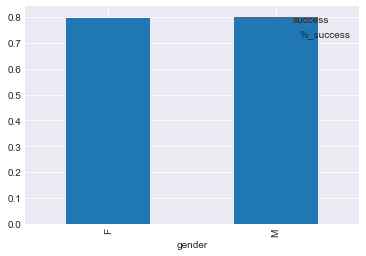

In [4]:
gender_groupped = df.groupby(['success', 'gender']).count()['patient_id']
gender_groupped = gender_groupped.unstack(level = 0)
gender_groupped['total'] = gender_groupped[0] + gender_groupped[1]
gender_groupped['%_success'] = gender_groupped[1] / gender_groupped['total']
gender_groupped[['%_success']].plot.bar()

#### Observations
There is no discernible difference between male and female patients. The success rate of male to female patients are within one percent of each other, indicating no correlation at all.

## 2. Correlations
Next, we attempt to undcover if there are any correlations between success and any of the other single dependent variables. This is achieved by using the pandas library to calculate the 'Pearsons R' value for each of the variables. Any values approaching 1 or -1 indicate a correlation between the success rate and the dependent variable.

In [5]:
df['scholarship'].corr(df['success'])

-0.029390574536307213

In [6]:
df['hipertension'].corr(df['success'])

0.036175874201493624

In [7]:
df['diabetes'].corr(df['success'])

0.015169351261922566

In [8]:
df['alcoholism'].corr(df['success'])

0.00024458951218007924

In [9]:
df['handcap'].corr(df['success'])

0.007762077995618917

In [10]:
df['sms_received'].corr(df['success'])

-0.1266782067897104

### Observations
The correlations between the variables analysed are weak. Neither the scholarship, hipertension, diabetes, alcoholism or handcap appear to have any effect on the likelyhood that the patient shows to the appointment. The highest Pearsons R value identified is the Sms received which indicates a negative correlation of -0.12. However, this value is too weak to provide any conclusions. A future experiment would be to test frequency of SMS and at varying times before the appointment. This could impact the correlation, however it is outside the scope of this analysis. 

## 3. Neighbourhood
Taking a look at different neighbourhoods to see if there may be a correlation

In [11]:
neighbourhood = df.groupby(['neighbourhood', 'success']).count()
b = neighbourhood['age']
b = b.unstack()

In [12]:
b['total'] = b[1] + b[0]

In [13]:
b.columns = ['no_show','show', 'total']

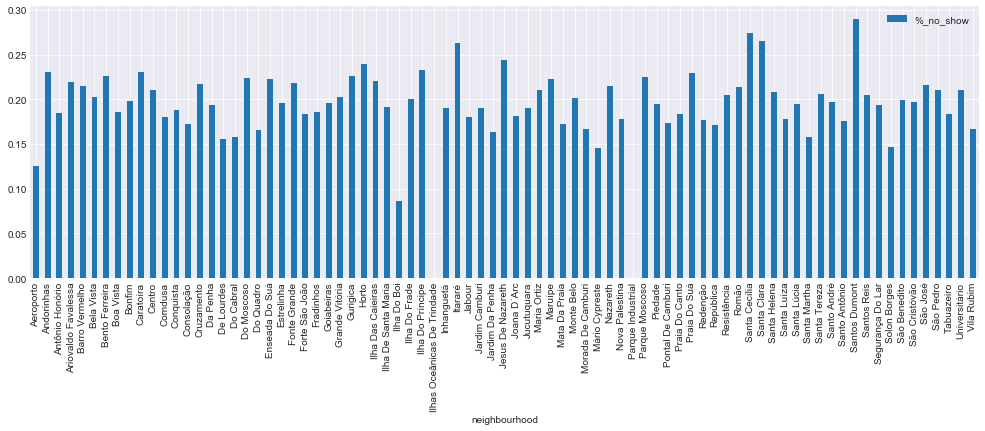

In [14]:
b['%_no_show'] = b['no_show'] / b['total']
b['%_show'] = b['show'] / b['total']
b.fillna(0)
b[['%_no_show']].plot.bar(figsize=(17,5))

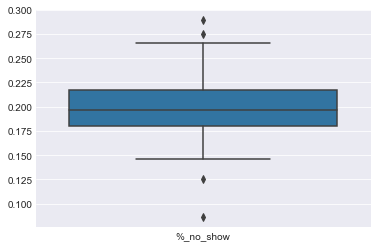

In [15]:
# look at box plot to see if there are any outliers
sns.boxplot(data=b[['%_no_show']])

In [16]:
b[['%_no_show']].describe()

,%_no_show
count,79.000000
mean,0.198028
std,0.031718
min,0.085714
25%,0.180199
50%,0.196721
75%,0.216684
max,0.289639


In [17]:
# Try to get the outliers
# IQR is q3 - q1
iqr = 0.216684 - 0.180199 

# Determine outliers
b[b['%_no_show'] > 0.216684 + (1.5 * iqr)]

,no_show,show,total,%_no_show,%_show
neighbourhood,,,,,
Santa Cecília,123.0,325.0,448.0,0.274554,0.725446
Santos Dumont,369.0,905.0,1274.0,0.289639,0.710361


In [18]:
b[b['%_no_show'] < 0.180199 - (1.5 * iqr)]

,no_show,show,total,%_no_show,%_show
neighbourhood,,,,,
Aeroporto,1.0,7.0,8.0,0.125000,0.875000
Ilha Do Boi,3.0,32.0,35.0,0.085714,0.914286


#### Neighbourhood Observations
We observe from this that in the outliers the neighbourhoods of Santa Cecília and Santos Dumont have a very high % of no shows whilst the neighbourhoods of Aeroporto and Illha Do Boi have a very low % of no shows

## 4. Age

In [19]:
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  86,
        91,  98,  92,  94,  96,  93,  95,  97, 102, 115, 100,  99])

In [20]:
age = df[['age', 'success']].copy()

In [21]:
# Group everything into age
def group_age (row):
    if row['age'] <= 20 :
        return '0-20'
    elif row['age'] <= 30:
        return '21-30'
    elif row['age'] <= 40:
        return '31-40'
    elif row['age'] <= 50:
        return '41-50'
    elif row['age'] <= 60:
        return '51-60'
    elif row['age'] <= 70:
        return '61-70'
    elif row['age'] <= 80:
        return '71-80'
    elif row['age'] <= 90:
        return '81-90'
    else:
        return '>90'

In [22]:
age['groupped_age'] = age.apply(lambda row: group_age (row), axis = 1)

In [23]:
groupped_age = age.groupby('groupped_age').count()
groupped_age.drop('age', inplace = True, axis = 1)
groupped_age.columns = ['total']
groupped_age.head()

,total
groupped_age,
0-20,31797
21-30,13771
31-40,15027
41-50,14402
51-60,15639


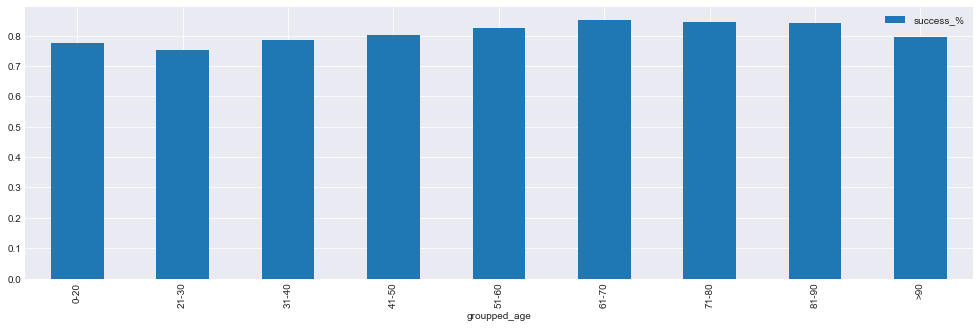

In [24]:
age_success = age.groupby('groupped_age').sum()
groupped_age['success'] = age_success['success']
groupped_age['success_%'] = groupped_age['success'] / groupped_age['total']
import matplotlib.pyplot as plt

ax = groupped_age[['success_%']].plot.bar(figsize=(17,5))

#### Age observations
There is a slight trend, the lowest group is 21-30 with the highest being 61-70

## 5. Time
We want to see if any of the following exists:
1. If there is any correlation between the appointment day and success rate
2. If there is any correlation between the appointment month and success rate
3. If the difference between appointment date and when they set the date indicates a success rate 

### Day vs success

In [25]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

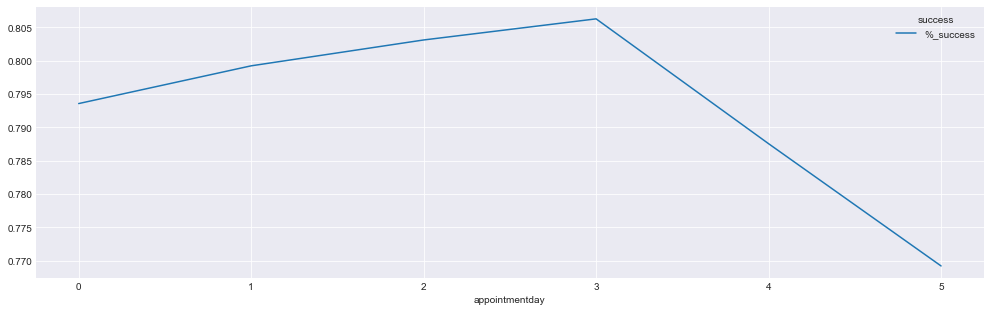

In [26]:
day_of_week = generate_simple_analysis(df, df['appointmentday'].dt.dayofweek)
day_of_week[['%_success']].plot(figsize=(17, 5))

Given that 0 = Monday and 6 = Sunday, we can see that it drops off drastically towards the end of the week - Friday and saturday

### Month vs Success

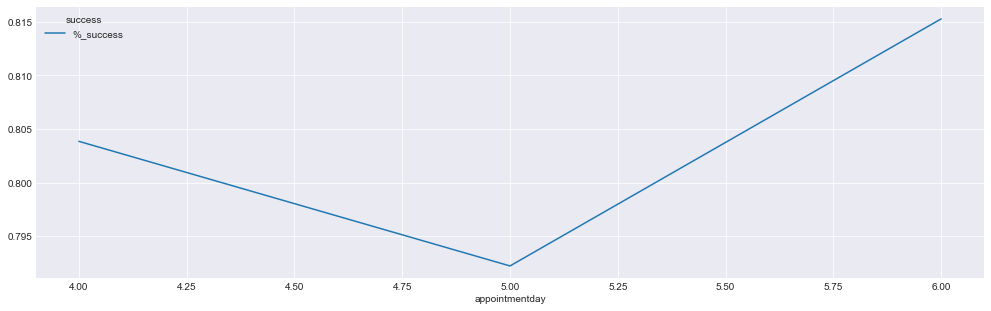

In [27]:
month_of_week = generate_simple_analysis(df, df['appointmentday'].dt.month)
month_of_week[['%_success']].plot(figsize=(17, 5))

We don't have a lot of data here and it looks roughly the same so we're going to ignore this for now

### Difference in appointment and schedule vs success

In [111]:
df['difference'] = df['appointmentday'].dt.date - df['scheduled_day'].dt.date

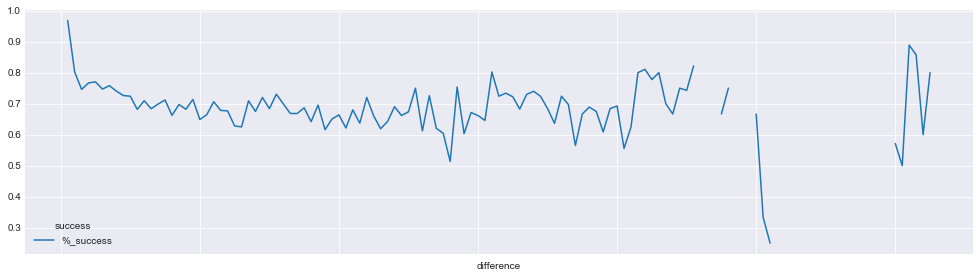

In [112]:
difference = generate_simple_analysis(df, 'difference')
difference[['%_success']].plot(figsize=(17, 5))

#### Time Observations
We can see that there is a significant drop in success rates during Friday and Saturday
There is no indication of monthly trends (not enough data)
difference in day?? # Todo

## 6. Repeat patients
Are repeat patients more likely to be successful?

In [30]:
# number of unique patients
len(df.patient_id.unique())

62190

In [31]:
# Total bookings
df.patient_id.count()

110327

In [32]:
# We can see there are patients who have booked more than once
df['repeat'] = df['patient_id'].duplicated()

# We only want the last booking of repeat customers
df.drop_duplicates(subset = 'patient_id', keep = 'last', inplace = True)

In [33]:
repeat = generate_simple_analysis(df, 'repeat')
# repeat[['%_success']].plot.bar(figsize=(17, 5))
repeat

success,0,1,total,%_success
repeat,,,,
False,7106,30751,37857,0.812294
True,5097,19236,24333,0.790531


#### Repeat patient observations
There isn't really a difference in success for a repeat patient

## Multi Variable Analysis
The following we have seen have impact on the success rate and we will dive deeper into them:
- Day of appointment
- Neighbourhood
- Groupped age

In [34]:
success = df[df['success'] == 1].copy()

### Day of appointment and Neighbourhood Success Rate
Based on the previous data, can we combine the two and infer something? So for example, will Santa Cecília and Santos Dumont on a Thursday have a higher success rate than Aeroporto and Illha Do Boi on a Friday or Saturday?

Text(0,0.5,'% of success')

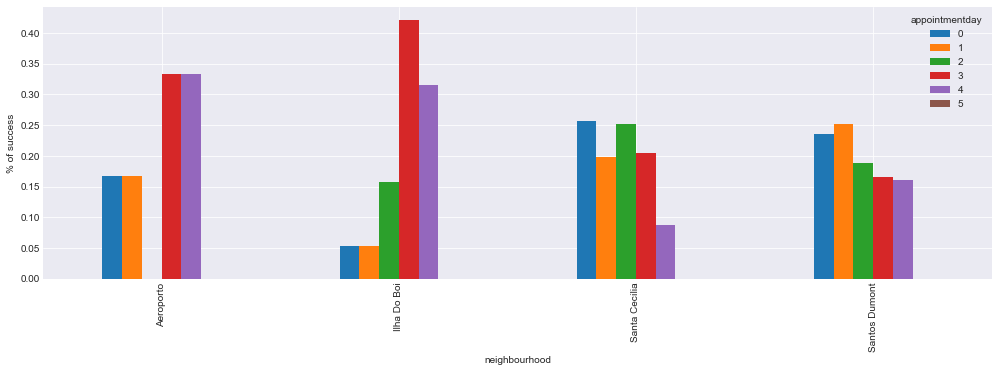

In [87]:
a1 = success.groupby(['neighbourhood', success.appointmentday.dt.dayofweek]).count()['patient_id'] 
a1 = a1.unstack(level = 1)
a1
a1.fillna(0, inplace = True)
a1['total'] = a1[0] + a1[1] + a1[2] + a1[3] + a1[4] + a1[5]

for column in a1:
    a1[column] = a1[column] / a1['total']

a1.drop('total', inplace = True, axis = 1)


a1[a1.index.isin(['Santa Cecília', 'Santos Dumont', 'Ilha Do Boi', 'Aeroporto'])].plot.bar(figsize = (17, 5))
plt.ylabel('% of success')

### Groupped Age and Neighbourhood Success Rate

### Day of Appointment and Groupped age Success Rate

<a id='conclusion'></a>
# Conclusions

We gather that there are some suburbs

Days